## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata_df, study_results_df)


# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Check the number of mice
mice_count = len(combined_df["Mouse ID"].unique())
mice_count

249

In [4]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicate_rows = combined_df.loc[combined_df.duplicated()]
duplicate_rows



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Drop any duplicate rows
clean_data = combined_df.drop(combined_df[combined_df['Mouse ID'] == 'g989'].index)
clean_df = pd.DataFrame(clean_data)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Recheck the number of mice
clean_mice_count = len(clean_df["Mouse ID"].unique())
clean_mice_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
regimen_mice = clean_df.groupby(["Drug Regimen"])

regimen_mean = regimen_mice["Tumor Volume (mm3)"].mean() 
regimen_median = regimen_mice["Tumor Volume (mm3)"].median()
regimen_varience = regimen_mice["Tumor Volume (mm3)"].var()
regimen_std = regimen_mice["Tumor Volume (mm3)"].std()
regimen_sem = regimen_mice["Tumor Volume (mm3)"].sem()

summary = {"Mean":regimen_mean,"Median":regimen_median,"Varience":regimen_varience,"Standard Deviation":regimen_std,"SEM":regimen_sem}
summary_df = pd.DataFrame(summary)
summary_df


,Mean,Median,Varience,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

AttributeError: 'AxesSubplot' object has no attribute 'set_ylabel9'

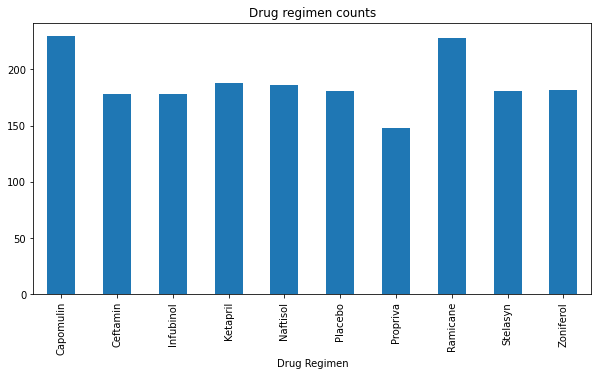

In [8]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen
mice_count = regimen_mice.count()['Mouse ID']
count_chart= mice_count.plot(kind = 'bar', figsize=(10,5))
plt.title('Drug regimen counts')
count_chart.set_ylabel9('Mice Counts')




In [ ]:
# Generate identical bar plot using pyplot instead of pandas.
pandas_drugs = summary_df.index.tolist()
pandas_drugs
reg_count = (clean_df.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
reg_count
plt.figure(figsize = (10,5))
plt.bar(pandas_drugs, reg_count, align = 'center')
plt.title('Drug Regiment Counts')
plt.xlabel('Drugs Regimens')
plt.ylabel('Mice Count')


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df['Sex'].value_counts()

gender.plot(kind = 'pie', figsize = (4,8), autopct = '%1.1f%%')
plt.title('Mice Counts')


In [ ]:
# Generate identical pie plot using pyplot
plt.pie(gender.values, labels = gender.index.values, autopct = '%1.1f%%', startagnle=360)
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [14]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

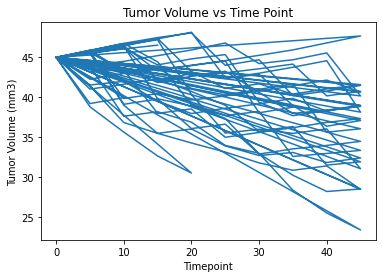

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
mouse_time = clean_df["Timepoint"].loc[clean_df["Drug Regimen"]=="Capomulin"] 
mouse_volume = clean_df["Tumor Volume (mm3)"].loc[clean_df["Drug Regimen"]=="Capomulin"]
plt.plot(mouse_time,mouse_volume)
plt.title("Tumor Volume vs Time Point")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen



## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights